## Section E. Multiclass Perceptron

In this section, you are asked to demonstrate your understanding of linear models
for classification. This section assesses your
programming, and analytical skills. <br>
Background. Assume we have N training examples {(x1,t1),...,(xN,tN)} where tn can
get K discrete values {C1, ..., CK}, i.e. a K-class classification problem. We use 𝑦𝑛 to
represent the predicted label of 𝑥𝑛
Model. To solve a K-class classification problem, we can learn K weight vectors
wk, each of which corresponding to one of the classes. <br>
Prediction. In the prediction time, a data point x will be classified as argmaxk wk . x
6 <br>
Training Algorithm. We train the multiclass perceptron based on the following
algorithm: <br>
• Initialise the weight vectors randomly w1,..,wK <br>
• While not converged do:
o For n = 1 to N do:
▪ y = argmaxk wk . xn <br>
▪ If yn != tn do <br>
• 𝒘𝑦𝑛 <br>
: = 𝒘𝑦𝑛 − η𝒙𝑛
• 𝒘𝑡𝑛 <br>
: = 𝒘𝑡𝑛 + η𝒙𝑛 <br>
In what follows, we look into the convergence properties of the training algorithm
for multiclass perceptron (similar to Activity 1 of Module 3).

In [1]:
library(ggplot2)  # for plotting functions.
library(reshape2) # for melt and cast functions

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"

### Question 6 [Multiclass Perceptron]

1. Load Task1D_train.csv and Task1D_test.csv sets.

In [3]:
train_data = read.csv('Task1D_train.csv')
test_data = read.csv('Task1D_test.csv')

In [4]:
head(train_data,3)
head(test_data,3)

x1,x2,x3,x4,y
5.1,3.5,1.4,0.2,C1
4.7,3.2,1.3,0.2,C1
5.0,3.6,1.4,0.2,C1


x1,x2,x3,x4,y
4.9,3.0,1.4,0.2,C1
4.6,3.1,1.5,0.2,C1
5.4,3.9,1.7,0.4,C1


In [6]:
levels(train_data$y)

[1] "C1" "C2" "C3"

2. Implement the multiclass perceptron as explained above. Please provide
enough comments for your code in your submission.

In [5]:
train.data = train_data[,-5]   # slicing out the target
train.label = train_data[,5]  # training data label
test.data = test_data[,-5]   
test.label = test_data[,5]

# Scale data
train.data=scale(train.data) # scales data for better distribution

test.data=scale(test.data)

train.len = nrow(train_data)
test.len = nrow(test_data)

In [5]:
# epsilon: Stoping criterion
# eta: Learning Rate
# tau.max: Maximum number of iterations

In [11]:
multi_class_perceptron <- function(train.data, train.label, eta, epsilon=0.001, tau_max=10000) {
    
    
    Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 to training data
    T <- train.label # rename just for conviniance
    
    # Weight vectors for each 3 classes
    Weight_1 <- matrix(,nrow=tau_max, ncol=ncol(Phi)) # Empty Weight vector
    Weight_2 <- matrix(,nrow=tau_max, ncol=ncol(Phi)) # Empty Weight vector
    Weight_3 <- matrix(,nrow=tau_max, ncol=ncol(Phi)) # Empty Weight vector
    
    Weight_1[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
    Weight_2[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
    Weight_3[1,] <- runif(ncol(Phi)) # Random initial values for weight vector

    error = matrix(,nrow=tau_max, ncol=1) # To store error values

    tau <- 1 # iteration counter 
    terminate <- FALSE # termination status
    
    
    while(!terminate){
    
    # Shuffle the data
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T[train.index]
    
    #For each point...
    for (i in train.index){
        
        # Check the termination creteria
        if (tau == tau_max) {break}
        
        # Calculate the predictions of current models for current point
        value1= Weight_1[tau,]%*%Phi[i,]
        value2= Weight_2[tau,]%*%Phi[i,]
        value3= Weight_3[tau,]%*%Phi[i,]
        maximum = max(value1,value2,value3)
        
        
        # If prediction doesn't match with label...
        if (value1==maximum && T[i]!="C1"|value2==maximum && T[i]!="C2"|value3==maximum && T[i] !="C3"){
            
            # Increase iteration counter
            tau = tau +1
            
            # Update coefficients
            if (T[i]=='C1' && maximum==value2){
                Weight_1[tau,] = Weight_1[tau-1,] + eta*Phi[i,]
                Weight_2[tau,] = Weight_2[tau-1,] - eta*Phi[i,]
                Weight_3[tau,] = Weight_3[tau-1,]
            
            }else if (T[i]=='C1' && maximum==value3){
                Weight_1[tau,] = Weight_1[tau-1,] + eta*Phi[i,]
                Weight_2[tau,] = Weight_2[tau-1,]
                Weight_3[tau,] = Weight_3[tau-1,] - eta*Phi[i,]
            
            }else if (T[i]=='C2' && maximum==value1){
                Weight_1[tau,] = Weight_1[tau-1,] - eta*Phi[i,]
                Weight_2[tau,] = Weight_2[tau-1,] + eta*Phi[i,]
                Weight_3[tau,] = Weight_3[tau-1,]
            }else if (T[i]=='C2' && maximum==value3){
                Weight_1[tau,] = Weight_1[tau-1,]
                Weight_2[tau,] = Weight_2[tau-1,] + eta*Phi[i,]
                Weight_3[tau,] = Weight_3[tau-1,] - eta*Phi[i,]
            
            }else if (T[i]=='C3' && maximum==value2){
                Weight_1[tau,] = Weight_1[tau-1,]
                Weight_2[tau,] = Weight_2[tau-1,] - eta*Phi[i,]
                Weight_3[tau,] = Weight_3[tau-1,] + eta*Phi[i,]
                
            }else if (T[i]=='C3' && maximum==value1){
                Weight_1[tau,] = Weight_1[tau-1,] - eta*Phi[i,]
                Weight_2[tau,] = Weight_2[tau-1,]
                Weight_3[tau,] = Weight_3[tau-1,] + eta*Phi[i,]
               
            }
         
        }        
    }
    

    # Calculate predictions for current models and the error value

#     print(Weight_1[tau,])
#     print(t(Phi))
#     print(t(Weight_1[tau,]%*%t(Phi)))
    
    predictions_model=as.data.frame(cbind(t(Weight_1[tau,]%*%t(Phi)),t(Weight_2[tau,]%*%t(Phi)),t(Weight_3[tau,]%*%t(Phi))))
#     print(predictions_model)
    for (row in 1:nrow(predictions_model)){
        predictions_model[row,'pred']=paste('C', which.max(predictions_model[row,]),sep = '')
    }
        
        
#     print(predictions_model)
        
    error_percent=1-(sum(predictions_model[,'pred']==T)/nrow(predictions_model))
    
    
    # recalculate termination conditions
    terminate <- (tau >= tau_max | (error_percent<=epsilon))
    }

    # Done, trim the dataframes
    Weight_1 <- Weight_1[1:tau,]
    Weight_2 <- Weight_2[1:tau,]
    Weight_3 <- Weight_3[1:tau,]
    
    return(list(Weight_1,Weight_2,Weight_3))
    
}

In [13]:
# multi_class_perceptron(train.data, train.label, eta=0.09, epsilon=0.001, tau_max=75)

In [7]:
multi_class_prediction <- function(test.data, test.label, Weight_1, Weight_2, Weight_3){
    # test data appropriate for multiplication with model parameters
    test.Phi <- as.matrix(cbind(1, test.data))

    # Data frame to store error values and corresponding batch
    error.percentage=data.frame(0,ncol=2)
    colnames(error.percentage)=c('Batch','Error Percentage')
    
    # Initilise batch.no
    batch_number=0

    # For each batch...
    for (batch in seq(5,nrow(Weight_1),5)){

        # Calculate batch No
        batch_number= batch_number + 1

        # Make predictions on entire test data using each W
        predictions=as.data.frame(cbind(t(Weight_1[batch,]%*%t(test.Phi)),t(Weight_2[batch,]%*%t(test.Phi)),t(Weight_3[batch,]%*%t(test.Phi))))     

        # Classify predicted points
        for (row in 1:nrow(predictions)){
            predictions[row,'pred']=paste('C', which.max(predictions[row,]),sep = '')
        }

        # Store Batch no and Ratio of missclassifications
        error.percentage[batch_number,1]=batch_number
        error.percentage[batch_number,2]=1-(sum(predictions[,'pred']==test.label)/nrow(predictions))

}
    
    return(list(predictions, error.percentage))
    
}

3. Train two multiclass perceptron models on the provided training data by
setting the learning rates η to .09 and .01 respectively. Note that all
parameter settings stay the same, except the learning rate, when building
each model.
For each model, evaluate the error of the model on the test data, after
processing every 5 training data points (also known as a mini-batch). Then,
plot the testing errors of two models built based on the learning rates .09
and .01(with different colors) versus the number of mini-batches. Include
it in your Jupyter Notebook file for Question 6.
Now, explain how the testing errors of two models behave differently, as
the training data increases, by observing your plot. (Include all your
answers in your Jupyter Notebook file.)


Now we will make Predictions when learning rate = 0.09

In [59]:
set.seed(123)
# Train the model
model_coefficients = multi_class_perceptron(train.data, train.label, eta=0.09, epsilon=0.001, tau_max=75)
Weight_1 = as.matrix(as.data.frame(model_coefficients[1]))
Weight_2 = as.matrix(as.data.frame(model_coefficients[2]))
Weight_3 = as.matrix(as.data.frame(model_coefficients[3]))

# Make predictions
voted = multi_class_prediction(test.data, test.label, Weight_1, Weight_2, Weight_3)
print(voted)
predictions = voted[1]
error.percentage = voted[2]

[[1]]
            V1           V2           V3 pred
1  -0.61868774 -1.061585056 -3.880426487   C1
2  -0.53695979 -1.213690078 -3.866172972   C1
3   1.77719845  0.732380574 -2.230125176   C1
4   0.35586056 -0.426551933 -3.366184209   C1
5  -0.40770578 -0.938205278 -3.853424410   C1
6   0.26123138 -0.602458058 -3.395498544   C1
7  -0.98500827 -1.792099393 -4.571060373   C1
8   3.05609900  1.612189670 -1.742637132   C1
9   0.65348527 -0.195586005 -3.147785494   C1
10  1.34774817  0.211150347 -2.782621127   C1
11  1.14606531  0.116360112 -2.733427479   C1
12  0.27801686 -0.299397843 -2.820811022   C1
13 -0.54812540 -0.902158135 -3.675280006   C1
14  0.68811010 -0.096007329 -3.164351267   C1
15 -0.24737529 -0.956803764 -3.640899336   C1
16  0.61699393  0.044956806 -2.864131030   C1
17  2.43295227  1.064489183 -2.408021737   C1
18 -0.12867926 -0.764418437 -3.787417146   C1
19  0.72460144 -0.336550140 -3.448005732   C1
20  0.40782470 -0.324304099 -3.313429178   C1
21 -2.40745383 -2.350249788 

Now we will make Predictions when learning rate = 0.01

In [60]:
set.seed(123)
# Train the model
model_coefficients_1 = multi_class_perceptron(train.data, train.label, eta=0.01, epsilon=0.001, tau_max=75)
Weight_1 = as.matrix(as.data.frame(model_coefficients_1[1]))
Weight_2 = as.matrix(as.data.frame(model_coefficients_1[2]))
Weight_3 = as.matrix(as.data.frame(model_coefficients_1[3]))

# Make predictions
voted_1 = multi_class_prediction(test.data, test.label, Weight_1, Weight_2, Weight_3)
print(voted_1)
predictions_1 = voted_1[1]
error.percentage_1 = voted_1[2]

[[1]]
           V1          V2           V3 pred
1  -1.7077611 -1.88707545 -1.965862703   C1
2  -1.7069319 -1.92139560 -1.988495336   C1
3   0.2450467 -0.01817667  0.052583816   C1
4  -0.9932472 -1.21818904 -1.225439346   C1
5  -1.5993308 -1.77922404 -1.820780674   C1
6  -1.0867831 -1.32167458 -1.328267522   C1
7  -2.2422435 -2.49668383 -2.609240717   C1
8   1.1499953  0.81788441  0.957771801   C1
9  -0.7284090 -0.97526237 -0.986214850   C1
10 -0.2312857 -0.51717290 -0.475263996   C1
11 -0.3102265 -0.58687830 -0.573897240   C1
12 -0.7978219 -1.00023517 -1.044134983   C1
13 -1.5872692 -1.73996767 -1.798326653   C1
14 -0.7143438 -0.93657635 -0.921328363   C1
15 -1.4600517 -1.67245266 -1.712574048   C1
16 -0.5933220 -0.79437446 -0.814483868   C1
17  0.5318502  0.21759305  0.339976453   C1
18 -1.3934717 -1.61258937 -1.674453747   C1
19 -0.8494308 -1.11746426 -1.093059344   C1
20 -0.9317344 -1.14737327 -1.150800866   C1
21 -2.9975099 -3.11807688 -3.338502790   C1
22 -0.5001313 -0.75895888 

Now we will convert the convert both the lists returned above into dataframe and rename columns for our understanding

In [10]:
batch_data_0.01 = as.data.frame(error.percentage_1)
names(batch_data_0.01) <- c('Batch','batch_err_0.01')

In [11]:
batch_data_0.09 = as.data.frame(error.percentage)
names(batch_data_0.09) <- c('Batch','batch_err_0.09')

We will now be concatenating the data for further visualization and then using the melt function for reshaping our data.

In [12]:
error_miss = data.frame('Batch'=batch_data_0.01$Batch,'error_0.01'=batch_data_0.01$batch_err_0.01,'error_0.09'= batch_data_0.09$batch_err_0.09)

In [13]:
error.m_1=melt(error_miss, id='Batch')

#### Plotting errors with learning rate 0.01 and 0.09

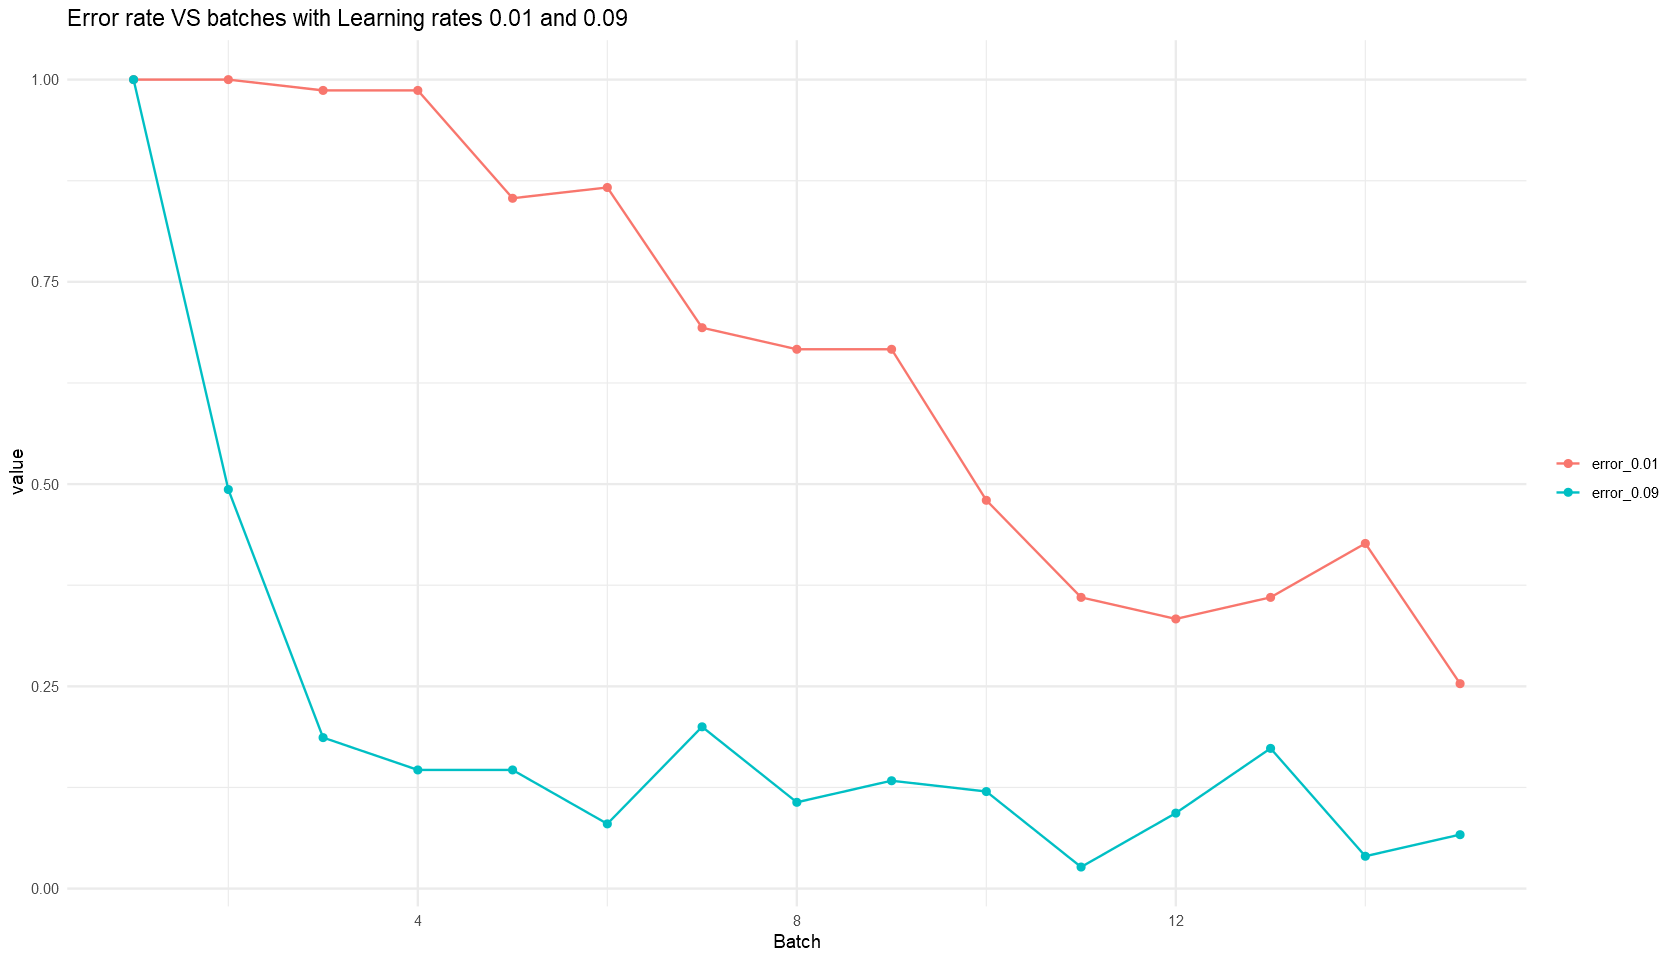

In [14]:
options(repr.plot.width=14, repr.plot.height=8)
# Plot Batch no vs Missclassification Ratio


ggplot(data=error.m_1, aes(x=Batch, y=value, color=variable)) + geom_line() + geom_point()+
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Error rate VS batches with Learning rates 0.01 and 0.09")

#### Observations from the plot : <br>

* Batch label 1 corresponds to 5 data points, batch label 2 to 10 data points, batch label 3 to 15 data points and so on. In each case i.e 5th, 10th or data points, the optimised weights at that point are considered for training our data.

* We can see that when optimisation level or max iteration is higher the errors for both the learning curves decreases. This is mainly due to higher optimisation of the weights.

**Learning Rate** <br>

* Plot shows learning rates 0.01 and 0.09 vs batch. 
* For learning rate = 0.01, the model descent is at a lower pace and our weights are optimsed at a slower rate. The error rate hence is gradually decreasin.

* For learning rate = 0.09, the model descent is much higher and our weights are optimised at a higher rate. The error rate hence decreases abruptly as compared to the learning rate = 0.01.